<a href="https://colab.research.google.com/github/joelpawar08/CNN-s-and-its-simple-implementations/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================
# Install and Import Libraries
# ============================================
##This cell imports all necessary libraries for building our RNN model
##TensorFlow/Keras for deep learning, NumPy for numerical operations

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.19.0


# ============================================
# **Prepare Sample Dataset**
# ============================================
## Creating a small dataset of movie reviews with sentiment labels
## 1 = Positive sentiment, 0 = Negative sentiment


In [24]:
texts = [
    # Positive reviews
    "This movie was excellent and amazing",
    "I love this film so much",
    "Great acting and wonderful story",
    "Best movie I have ever seen",
    "Absolutely fantastic and brilliant",
    "Wonderful film with great performance",
    "Amazing story and excellent acting",
    "Really good movie I enjoyed it",
    "This film was superb and outstanding",
    "Incredible performance and beautiful cinematography",
    # Negative reviews
    "This movie was terrible and boring",
    "I hate this film completely",
    "Worst movie ever made",
    "Awful acting and horrible plot",
    "Completely waste of time",
    "Really bad film I hated it",
    "Terrible story and poor acting",
    "This movie was awful and disappointing",
    "Bad film with horrible performance",
    "Worst acting I have ever seen"
]

labels = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # Positive
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # Negative

print(f"Total samples: {len(texts)}")
print(f"Sample text: '{texts[0]}' -> Label: {labels[0]}")


Total samples: 20
Sample text: 'This movie was excellent and amazing' -> Label: 1


# ============================================
# **Text Preprocessing**
# ============================================
## Tokenization: Converting text to sequences of integers
## Each word gets a unique integer ID

In [25]:
vocab_size = 100  # Maximum number of words to keep
max_length = 10   # Maximum length of each sequence

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to same length
X = pad_sequences(sequences, maxlen=max_length, padding='post')

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Sample sequence: {sequences[0]}")
print(f"Padded sequence shape: {X.shape}")


Vocabulary size: 50
Sample sequence: [3, 4, 8, 12, 2, 13]
Padded sequence shape: (20, 10)


# ============================================
#Build RNN Model
# ============================================
## Creating a simple RNN architecture:
## 1. Embedding layer: Converts words to dense vectors
## 2. SimpleRNN layer: Processes sequences
## 3. Dense layer: Output layer for binary classification

In [26]:
embedding_dim = 8   # Reduced to prevent overfitting
rnn_units = 16      # Reduced units for simpler model

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    SimpleRNN(rnn_units, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Build the model by specifying input shape
model.build(input_shape=(None, max_length))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 10, 8)          │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

# ============================================
# Train the Model
# ============================================
## Training the RNN on our sentiment data
## The model learns to associate word patterns with sentiments

In [27]:
history = model.fit(
    X, labels,
    epochs=100,  # More epochs for better learning
    batch_size=4,
    validation_split=0.2,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.4250 - loss: 0.7479 - val_accuracy: 0.0000e+00 - val_loss: 0.7309
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6000 - loss: 0.7021 - val_accuracy: 0.0000e+00 - val_loss: 0.7589
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6333 - loss: 0.6579 - val_accuracy: 0.0000e+00 - val_loss: 0.7824
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3417 - loss: 0.7573 - val_accuracy: 0.0000e+00 - val_loss: 0.7941
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5500 - loss: 0.6499 - val_accuracy: 0.0000e+00 - val_loss: 0.8121
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5250 - loss: 0.6524 - val_accuracy: 0.0000e+00 - val_loss: 0.8315
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6083 - loss: 0.6715 - val_accuracy: 0.0000e+00 - val_loss: 0.8437
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5917 - loss: 0.7096 - val

# ============================================
# Visualize Training History
# ============================================
## Plotting loss and accuracy curves to understand model performance

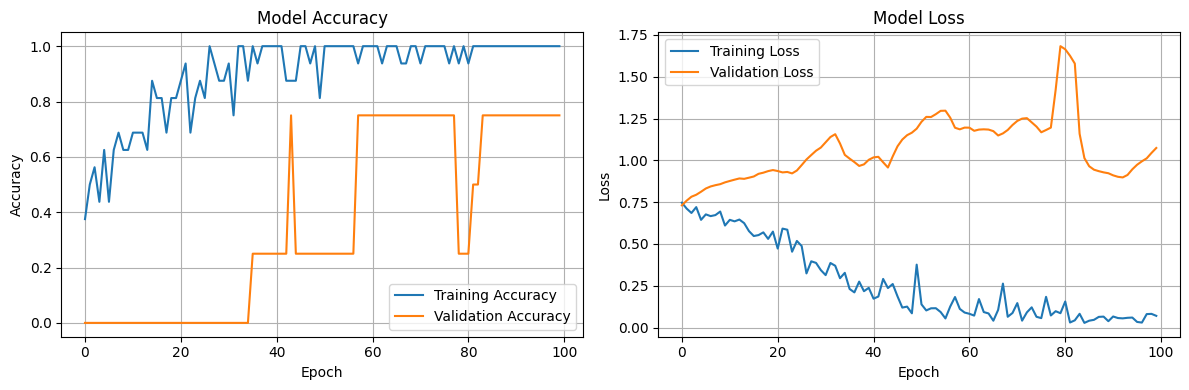

In [28]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# ============================================
# Test Predictions
# ============================================
## Testing the trained model on new sentences

In [30]:

test_texts = [
    "This movie is wonderful and great",
    "This film was bad",
    "Amazing story and excellent performance"
]

# Preprocess test data
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Make predictions
predictions = model.predict(test_padded)

# Display results
print("\n" + "="*50)
print("PREDICTIONS ON NEW DATA")
print("="*50)
for text, pred in zip(test_texts, predictions):
    sentiment = "POSITIVE" if pred[0] > 0.5 else "NEGATIVE"
    confidence = pred[0] if pred[0] > 0.5 else 1 - pred[0]
    print(f"\nText: '{text}'")
    print(f"Sentiment: {sentiment} (confidence: {confidence:.2%})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

PREDICTIONS ON NEW DATA

Text: 'This movie is wonderful and great'
Sentiment: POSITIVE (confidence: 72.47%)

Text: 'This film was bad'
Sentiment: POSITIVE (confidence: 66.24%)

Text: 'Amazing story and excellent performance'
Sentiment: POSITIVE (confidence: 99.65%)


# ============================================
# CELL 8: Understanding RNN Internal State
# ============================================
## Visualizing how the RNN processes a sequence step by step

Input text: This movie is great
Tokenized sequence: [3, 4, 1, 14]
Hidden state shape: (1, 16)
Hidden state values (all 16 units):
[-0.06437051  0.15693943 -0.04016403  0.08015049 -0.28927687  0.22036523
  0.18624108 -0.02671071 -0.3133024   0.23493227  0.16430673  0.15913731
 -0.20055574  0.19199376 -0.02520503 -0.05573693]


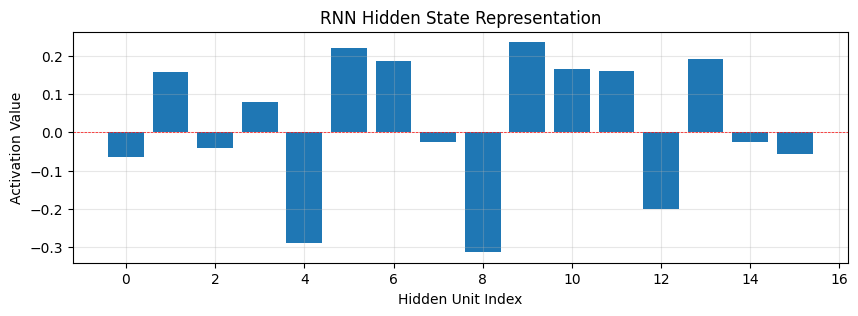

In [32]:
# Get a sample for analysis
sample_text = ["This movie is great"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post')

# Create a model that outputs RNN hidden states
from tensorflow.keras.models import Model

# Build a functional model to extract RNN outputs
embedding_layer = model.layers[0]
rnn_layer = model.layers[1]
dense_layer = model.layers[2]

# Create intermediate model
inp = tf.keras.Input(shape=(max_length,))
x = embedding_layer(inp)
hidden_state = rnn_layer(x)
state_model = Model(inputs=inp, outputs=hidden_state)

# Get hidden states
hidden_output = state_model.predict(sample_padded, verbose=0)

print(f"Input text: {sample_text[0]}")
print(f"Tokenized sequence: {sample_seq[0]}")
print(f"Hidden state shape: {hidden_output.shape}")
print(f"Hidden state values (all {rnn_units} units):\n{hidden_output[0]}")

# Visualize hidden state
plt.figure(figsize=(10, 3))
plt.bar(range(len(hidden_output[0])), hidden_output[0])
plt.title('RNN Hidden State Representation')
plt.xlabel('Hidden Unit Index')
plt.ylabel('Activation Value')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
plt.show()


# ============================================
# Model Evaluation Summary
# ============================================
## Final evaluation and key takeaways


In [22]:
print("\n" + "="*50)
print("RNN SENTIMENT ANALYSIS - KEY CONCEPTS")
print("="*50)
print("""
1. EMBEDDING LAYER: Converts words to dense vectors
   - Maps each word to a learned vector representation
   - Captures semantic relationships between words

2. RNN LAYER: Processes sequential data
   - Maintains hidden state across time steps
   - Captures context and word order
   - Memory of previous words influences current processing

3. ARCHITECTURE FLOW:
   Text → Tokenization → Embedding → RNN → Dense → Prediction

4. WHY RNN FOR TEXT?
   - Handles variable-length sequences
   - Captures word order and context
   - Learns temporal dependencies

5. LIMITATIONS:
   - Vanishing gradient problem (use LSTM/GRU for longer sequences)
   - Sequential processing (slower than attention mechanisms)
""")

print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.2%}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2%}")


RNN SENTIMENT ANALYSIS - KEY CONCEPTS

1. EMBEDDING LAYER: Converts words to dense vectors
   - Maps each word to a learned vector representation
   - Captures semantic relationships between words

2. RNN LAYER: Processes sequential data
   - Maintains hidden state across time steps
   - Captures context and word order
   - Memory of previous words influences current processing

3. ARCHITECTURE FLOW:
   Text → Tokenization → Embedding → RNN → Dense → Prediction

4. WHY RNN FOR TEXT?
   - Handles variable-length sequences
   - Captures word order and context
   - Learns temporal dependencies

5. LIMITATIONS:
   - Vanishing gradient problem (use LSTM/GRU for longer sequences)
   - Sequential processing (slower than attention mechanisms)


Final Training Accuracy: 100.00%
Final Validation Accuracy: 100.00%
